In [1]:
#["2.20", "2.16", "2.08", "2.00", "1.91", "1.81", "1.74", "1.69", "1.64", "1.60", "1.55", "1.51", "1.47", "1.45", "1.42", "1.37", "1.34", "1.32", "1.29", "1.25", "1.21","1.17", "1.14", "1.10", "1.10", "1.09", "1.05", "1.03", "1.02", "1.00"]
#[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

In [2]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
inflation = [2.2, 2.16, 2.08, 2.0, 1.91, 1.81, 1.74, 1.69, 1.64, 1.6, 1.55, 1.51, 1.47, 1.45, 1.42, 1.37, 1.34, 1.32, 1.29, 1.25, 1.21, 1.17, 1.14, 1.1, 1.1, 1.09, 1.05, 1.03, 1.02, 1.0]
year = [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
infl_x_year = {}
for num in range(len(year)):
    infl_x_year[year[num]] = inflation[num]

In [4]:
batting = pd.read_csv("data/batting.csv")
batting = batting[["playerID", "AB", "H", "BB", "HBP", "SF", "yearID"]]

pitching = pd.read_csv("data/Pitching.csv")
pitching = pitching[["playerID", "yearID", "W", "L", "ERA"]]

position = pd.read_csv("data/Appearances.csv")
position = position[["playerID","teamID", "yearID","G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b",
                     "G_ss", "G_lf", "G_cf", "G_rf", "G_of"]]

name = pd.read_csv("data/Master.csv")
name = name[["playerID", "nameLast", "nameGiven"]]

salary = pd.read_csv("data/Salaries.csv")
salary = salary[["playerID", "salary", "yearID"]]

In [5]:
master_list = pd.merge(batting, position, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, pitching, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, salary, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, name, how="outer", on = "playerID")
master_list.index = master_list.pop("playerID")
master_list.index = master_list.pop("nameLast")

In [6]:
pitchers = master_list[master_list.G_p >= 32]
pitchers.insert(3, "POS", "P")

catchers = master_list[master_list.G_c >= 81]
catchers.insert(3, "POS", "C")

first_base = master_list[master_list.G_1b >= 81]
first_base.insert(3, "POS", "1B")

second_base = master_list[master_list.G_2b >= 81]
second_base.insert(3, "POS", "2B")

third_base = master_list[master_list.G_3b >= 81]
third_base.insert(3, "POS", "3B")

short_stop = master_list[master_list.G_ss >= 81]
short_stop.insert(3, "POS", "SS")

left_field = master_list[master_list.G_lf >= 81]
left_field.insert(3, "POS", "LF")

center_field = master_list[master_list.G_cf >= 81]
center_field.insert(3, "POS", "CF")

right_field = master_list[master_list.G_rf >= 81]
right_field.insert(3, "POS", "RF")

In [7]:
pitchers = pitchers.dropna(how="any")
pitchers = pitchers.sort(columns = "yearID", axis = 0, ascending = True)

In [8]:
master_list = pd.concat([catchers, first_base, second_base, third_base, short_stop, left_field, center_field, right_field])
for_averages = pd.concat([pitchers, catchers, first_base, second_base, third_base, short_stop, left_field, center_field, right_field])

In [9]:
#pitchers = pitchers.dropna(how="any")
#master_list = master_list.dropna(how="any")
#for_averages = for_averages.dropna(how="any")

In [10]:
master_list = master_list.drop("G_all", axis=1)
master_list = master_list.drop("G_p", axis=1)
master_list = master_list.drop("G_c", axis=1)
master_list = master_list.drop("G_1b", axis=1)
master_list = master_list.drop("G_2b", axis=1)
master_list = master_list.drop("G_3b", axis=1)
master_list = master_list.drop("G_ss", axis=1)
master_list = master_list.drop("G_lf", axis=1)
master_list = master_list.drop("G_cf", axis=1)
master_list = master_list.drop("G_rf", axis=1)
master_list = master_list.drop("G_of", axis=1)
master_list = master_list.drop("W", axis=1)
master_list = master_list.drop("L", axis=1)
master_list = master_list.drop("ERA", axis=1)

for_averages = for_averages.drop("G_all", axis=1)
for_averages = for_averages.drop("G_p", axis=1)
for_averages = for_averages.drop("G_c", axis=1)
for_averages = for_averages.drop("G_1b", axis=1)
for_averages = for_averages.drop("G_2b", axis=1)
for_averages = for_averages.drop("G_3b", axis=1)
for_averages = for_averages.drop("G_ss", axis=1)
for_averages = for_averages.drop("G_lf", axis=1)
for_averages = for_averages.drop("G_cf", axis=1)
for_averages = for_averages.drop("G_rf", axis=1)
for_averages = for_averages.drop("G_of", axis=1)
for_averages = for_averages.drop("W", axis=1)
for_averages = for_averages.drop("L", axis=1)
for_averages = for_averages.drop("ERA", axis=1)

pitchers = pitchers.drop("G_all", axis=1)
pitchers = pitchers.drop("G_p", axis=1)
pitchers = pitchers.drop("G_c", axis=1)
pitchers = pitchers.drop("G_1b", axis=1)
pitchers = pitchers.drop("G_2b", axis=1)
pitchers = pitchers.drop("G_3b", axis=1)
pitchers = pitchers.drop("G_ss", axis=1)
pitchers = pitchers.drop("G_lf", axis=1)
pitchers = pitchers.drop("G_cf", axis=1)
pitchers = pitchers.drop("G_rf", axis=1)
pitchers = pitchers.drop("G_of", axis=1)

In [11]:
pitchers = pitchers.sort(columns = "yearID", axis = 0, ascending = True)
pitchers = pitchers.dropna(how="any")

master_list = master_list.sort(columns="yearID", axis = 0, ascending = True)
master_list = master_list.dropna(how="any")

for_averages = for_averages.sort(columns="yearID", axis = 0, ascending = True)
for_averages = for_averages.dropna(how="any")

In [12]:
master_list["OBA"] = (master_list.H + master_list.BB + master_list.HBP)/(master_list.AB + master_list.BB + master_list.HBP + master_list.SF)
pitchers["OBA"] = (pitchers.H + pitchers.BB + pitchers.HBP)/(pitchers.AB + pitchers.BB + pitchers.HBP + pitchers.SF)
for_averages["OBA"] = (for_averages.H + for_averages.BB + for_averages.HBP)/(for_averages.AB + for_averages.BB + for_averages.HBP + for_averages.SF)

In [13]:
master_list1985 = master_list[master_list.yearID == 1985]
master_list1986 = master_list[master_list.yearID == 1986]
master_list1987 = master_list[master_list.yearID == 1987]
master_list1988 = master_list[master_list.yearID == 1988]
master_list1989 = master_list[master_list.yearID == 1989]
master_list1990 = master_list[master_list.yearID == 1990]
master_list1991 = master_list[master_list.yearID == 1991]
master_list1992 = master_list[master_list.yearID == 1992]
master_list1993 = master_list[master_list.yearID == 1993]
master_list1994 = master_list[master_list.yearID == 1994]
master_list1995 = master_list[master_list.yearID == 1995]
master_list1996 = master_list[master_list.yearID == 1996]
master_list1997 = master_list[master_list.yearID == 1997]
master_list1998 = master_list[master_list.yearID == 1998]
master_list1999 = master_list[master_list.yearID == 1999]
master_list2000 = master_list[master_list.yearID == 2000]
master_list2001 = master_list[master_list.yearID == 2001]
master_list2002 = master_list[master_list.yearID == 2002]
master_list2003 = master_list[master_list.yearID == 2003]
master_list2004 = master_list[master_list.yearID == 2004]
master_list2005 = master_list[master_list.yearID == 2005]
master_list2006 = master_list[master_list.yearID == 2006]
master_list2007 = master_list[master_list.yearID == 2007]
master_list2008 = master_list[master_list.yearID == 2008]
master_list2009 = master_list[master_list.yearID == 2009]
master_list2010 = master_list[master_list.yearID == 2010]
master_list2011 = master_list[master_list.yearID == 2011]
master_list2012 = master_list[master_list.yearID == 2012]
master_list2013 = master_list[master_list.yearID == 2013]
master_list2014 = master_list[master_list.yearID == 2014]

pitchers1985 = pitchers[pitchers.yearID == 1985]
pitchers1986 = pitchers[pitchers.yearID == 1986]
pitchers1987 = pitchers[pitchers.yearID == 1987]
pitchers1988 = pitchers[pitchers.yearID == 1988]
pitchers1989 = pitchers[pitchers.yearID == 1989]
pitchers1990 = pitchers[pitchers.yearID == 1990]
pitchers1991 = pitchers[pitchers.yearID == 1991]
pitchers1992 = pitchers[pitchers.yearID == 1992]
pitchers1993 = pitchers[pitchers.yearID == 1993]
pitchers1994 = pitchers[pitchers.yearID == 1994]
pitchers1995 = pitchers[pitchers.yearID == 1995]
pitchers1996 = pitchers[pitchers.yearID == 1996]
pitchers1997 = pitchers[pitchers.yearID == 1997]
pitchers1998 = pitchers[pitchers.yearID == 1998]
pitchers1999 = pitchers[pitchers.yearID == 1999]
pitchers2000 = pitchers[pitchers.yearID == 2000]
pitchers2001 = pitchers[pitchers.yearID == 2001]
pitchers2002 = pitchers[pitchers.yearID == 2002]
pitchers2003 = pitchers[pitchers.yearID == 2003]
pitchers2004 = pitchers[pitchers.yearID == 2004]
pitchers2005 = pitchers[pitchers.yearID == 2005]
pitchers2006 = pitchers[pitchers.yearID == 2006]
pitchers2007 = pitchers[pitchers.yearID == 2007]
pitchers2008 = pitchers[pitchers.yearID == 2008]
pitchers2009 = pitchers[pitchers.yearID == 2009]
pitchers2010 = pitchers[pitchers.yearID == 2010]
pitchers2011 = pitchers[pitchers.yearID == 2011]
pitchers2012 = pitchers[pitchers.yearID == 2012]
pitchers2013 = pitchers[pitchers.yearID == 2013]
pitchers2014 = pitchers[pitchers.yearID == 2014]

for_averages1985 = for_averages[for_averages.yearID == 1985]
for_averages1986 = for_averages[for_averages.yearID == 1986]
for_averages1987 = for_averages[for_averages.yearID == 1987]
for_averages1988 = for_averages[for_averages.yearID == 1988]
for_averages1989 = for_averages[for_averages.yearID == 1989]
for_averages1990 = for_averages[for_averages.yearID == 1990]
for_averages1991 = for_averages[for_averages.yearID == 1991]
for_averages1992 = for_averages[for_averages.yearID == 1992]
for_averages1993 = for_averages[for_averages.yearID == 1993]
for_averages1994 = for_averages[for_averages.yearID == 1994]
for_averages1995 = for_averages[for_averages.yearID == 1995]
for_averages1996 = for_averages[for_averages.yearID == 1996]
for_averages1997 = for_averages[for_averages.yearID == 1997]
for_averages1998 = for_averages[for_averages.yearID == 1998]
for_averages1999 = for_averages[for_averages.yearID == 1999]
for_averages2000 = for_averages[for_averages.yearID == 2000]
for_averages2001 = for_averages[for_averages.yearID == 2001]
for_averages2002 = for_averages[for_averages.yearID == 2002]
for_averages2003 = for_averages[for_averages.yearID == 2003]
for_averages2004 = for_averages[for_averages.yearID == 2004]
for_averages2005 = for_averages[for_averages.yearID == 2005]
for_averages2006 = for_averages[for_averages.yearID == 2006]
for_averages2007 = for_averages[for_averages.yearID == 2007]
for_averages2008 = for_averages[for_averages.yearID == 2008]
for_averages2009 = for_averages[for_averages.yearID == 2009]
for_averages2010 = for_averages[for_averages.yearID == 2010]
for_averages2011 = for_averages[for_averages.yearID == 2011]
for_averages2012 = for_averages[for_averages.yearID == 2012]
for_averages2013 = for_averages[for_averages.yearID == 2013]
for_averages2014 = for_averages[for_averages.yearID == 2014]

In [14]:
master_list1985["infl_sal"] = (master_list1985.salary * infl_x_year[1985])
master_list1986["infl_sal"] = (master_list1986.salary * infl_x_year[1986])
master_list1987["infl_sal"] = (master_list1987.salary * infl_x_year[1987])
master_list1988["infl_sal"] = (master_list1988.salary * infl_x_year[1988])
master_list1989["infl_sal"] = (master_list1989.salary * infl_x_year[1989])
master_list1990["infl_sal"] = (master_list1990.salary * infl_x_year[1990])
master_list1991["infl_sal"] = (master_list1991.salary * infl_x_year[1991])
master_list1992["infl_sal"] = (master_list1992.salary * infl_x_year[1992])
master_list1993["infl_sal"] = (master_list1993.salary * infl_x_year[1993])
master_list1994["infl_sal"] = (master_list1994.salary * infl_x_year[1994])
master_list1995["infl_sal"] = (master_list1995.salary * infl_x_year[1995])
master_list1996["infl_sal"] = (master_list1996.salary * infl_x_year[1996])
master_list1997["infl_sal"] = (master_list1997.salary * infl_x_year[1997])
master_list1998["infl_sal"] = (master_list1998.salary * infl_x_year[1998])
master_list1999["infl_sal"] = (master_list1999.salary * infl_x_year[1999])
master_list2000["infl_sal"] = (master_list2000.salary * infl_x_year[2000])
master_list2001["infl_sal"] = (master_list2001.salary * infl_x_year[2001])
master_list2002["infl_sal"] = (master_list2002.salary * infl_x_year[2002])
master_list2003["infl_sal"] = (master_list2003.salary * infl_x_year[2003])
master_list2004["infl_sal"] = (master_list2004.salary * infl_x_year[2004])
master_list2005["infl_sal"] = (master_list2005.salary * infl_x_year[2005])
master_list2006["infl_sal"] = (master_list2006.salary * infl_x_year[2006])
master_list2007["infl_sal"] = (master_list2007.salary * infl_x_year[2007])
master_list2008["infl_sal"] = (master_list2008.salary * infl_x_year[2008])
master_list2009["infl_sal"] = (master_list2009.salary * infl_x_year[2009])
master_list2010["infl_sal"] = (master_list2010.salary * infl_x_year[2010])
master_list2011["infl_sal"] = (master_list2011.salary * infl_x_year[2011])
master_list2012["infl_sal"] = (master_list2012.salary * infl_x_year[2012])
master_list2013["infl_sal"] = (master_list2013.salary * infl_x_year[2013])
master_list2014["infl_sal"] = (master_list2014.salary * infl_x_year[2014])

pitchers1985["infl_sal"] = (pitchers1985.salary * infl_x_year[1985])
pitchers1986["infl_sal"] = (pitchers1986.salary * infl_x_year[1986])
pitchers1987["infl_sal"] = (pitchers1987.salary * infl_x_year[1987])
pitchers1988["infl_sal"] = (pitchers1988.salary * infl_x_year[1988])
pitchers1989["infl_sal"] = (pitchers1989.salary * infl_x_year[1989])
pitchers1990["infl_sal"] = (pitchers1990.salary * infl_x_year[1990])
pitchers1991["infl_sal"] = (pitchers1991.salary * infl_x_year[1991])
pitchers1992["infl_sal"] = (pitchers1992.salary * infl_x_year[1992])
pitchers1993["infl_sal"] = (pitchers1993.salary * infl_x_year[1993])
pitchers1994["infl_sal"] = (pitchers1994.salary * infl_x_year[1994])
pitchers1995["infl_sal"] = (pitchers1995.salary * infl_x_year[1995])
pitchers1996["infl_sal"] = (pitchers1996.salary * infl_x_year[1996])
pitchers1997["infl_sal"] = (pitchers1997.salary * infl_x_year[1997])
pitchers1998["infl_sal"] = (pitchers1998.salary * infl_x_year[1998])
pitchers1999["infl_sal"] = (pitchers1999.salary * infl_x_year[1999])
pitchers2000["infl_sal"] = (pitchers2000.salary * infl_x_year[2000])
pitchers2001["infl_sal"] = (pitchers2001.salary * infl_x_year[2001])
pitchers2002["infl_sal"] = (pitchers2002.salary * infl_x_year[2002])
pitchers2003["infl_sal"] = (pitchers2003.salary * infl_x_year[2003])
pitchers2004["infl_sal"] = (pitchers2004.salary * infl_x_year[2004])
pitchers2005["infl_sal"] = (pitchers2005.salary * infl_x_year[2005])
pitchers2006["infl_sal"] = (pitchers2006.salary * infl_x_year[2006])
pitchers2007["infl_sal"] = (pitchers2007.salary * infl_x_year[2007])
pitchers2008["infl_sal"] = (pitchers2008.salary * infl_x_year[2008])
pitchers2009["infl_sal"] = (pitchers2009.salary * infl_x_year[2009])
pitchers2010["infl_sal"] = (pitchers2010.salary * infl_x_year[2010])
pitchers2011["infl_sal"] = (pitchers2011.salary * infl_x_year[2011])
pitchers2012["infl_sal"] = (pitchers2012.salary * infl_x_year[2012])
pitchers2013["infl_sal"] = (pitchers2013.salary * infl_x_year[2013])
pitchers2014["infl_sal"] = (pitchers2014.salary * infl_x_year[2014])

for_averages1985["infl_sal"] = (for_averages1985.salary * infl_x_year[1985])
for_averages1986["infl_sal"] = (for_averages1986.salary * infl_x_year[1986])
for_averages1987["infl_sal"] = (for_averages1987.salary * infl_x_year[1987])
for_averages1988["infl_sal"] = (for_averages1988.salary * infl_x_year[1988])
for_averages1989["infl_sal"] = (for_averages1989.salary * infl_x_year[1989])
for_averages1990["infl_sal"] = (for_averages1990.salary * infl_x_year[1990])
for_averages1991["infl_sal"] = (for_averages1991.salary * infl_x_year[1991])
for_averages1992["infl_sal"] = (for_averages1992.salary * infl_x_year[1992])
for_averages1993["infl_sal"] = (for_averages1993.salary * infl_x_year[1993])
for_averages1994["infl_sal"] = (for_averages1994.salary * infl_x_year[1994])
for_averages1995["infl_sal"] = (for_averages1995.salary * infl_x_year[1995])
for_averages1996["infl_sal"] = (for_averages1996.salary * infl_x_year[1996])
for_averages1997["infl_sal"] = (for_averages1997.salary * infl_x_year[1997])
for_averages1998["infl_sal"] = (for_averages1998.salary * infl_x_year[1998])
for_averages1999["infl_sal"] = (for_averages1999.salary * infl_x_year[1999])
for_averages2000["infl_sal"] = (for_averages2000.salary * infl_x_year[2000])
for_averages2001["infl_sal"] = (for_averages2001.salary * infl_x_year[2001])
for_averages2002["infl_sal"] = (for_averages2002.salary * infl_x_year[2002])
for_averages2003["infl_sal"] = (for_averages2003.salary * infl_x_year[2003])
for_averages2004["infl_sal"] = (for_averages2004.salary * infl_x_year[2004])
for_averages2005["infl_sal"] = (for_averages2005.salary * infl_x_year[2005])
for_averages2006["infl_sal"] = (for_averages2006.salary * infl_x_year[2006])
for_averages2007["infl_sal"] = (for_averages2007.salary * infl_x_year[2007])
for_averages2008["infl_sal"] = (for_averages2008.salary * infl_x_year[2008])
for_averages2009["infl_sal"] = (for_averages2009.salary * infl_x_year[2009])
for_averages2010["infl_sal"] = (for_averages2010.salary * infl_x_year[2010])
for_averages2011["infl_sal"] = (for_averages2011.salary * infl_x_year[2011])
for_averages2012["infl_sal"] = (for_averages2012.salary * infl_x_year[2012])
for_averages2013["infl_sal"] = (for_averages2013.salary * infl_x_year[2013])
for_averages2014["infl_sal"] = (for_averages2014.salary * infl_x_year[2014])

/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarni

In [15]:
master_list = pd.concat([master_list1985, master_list1986, master_list1987, master_list1988, master_list1989, master_list1990, master_list1991, master_list1992, master_list1993, master_list1994, master_list1995, master_list1996, master_list1997, master_list1998, master_list1999, master_list2000, master_list2001, master_list2002, master_list2003, master_list2004, master_list2005, master_list2006, master_list2007, master_list2008, master_list2009, master_list2010, master_list2011, master_list2012, master_list2013, master_list2014])
pitchers = pd.concat([pitchers1985, pitchers1986, pitchers1987, pitchers1988, pitchers1989, pitchers1990, pitchers1991, pitchers1992, pitchers1993, pitchers1994, pitchers1995, pitchers1996, pitchers1997, pitchers1998, pitchers1999, pitchers2000, pitchers2001, pitchers2002, pitchers2003, pitchers2004, pitchers2005, pitchers2006, pitchers2007, pitchers2008, pitchers2009, pitchers2010, pitchers2011, pitchers2012, pitchers2013, pitchers2014])
for_averages = pd.concat([for_averages1985, for_averages1986, for_averages1987, for_averages1988, for_averages1989, for_averages1990, for_averages1991, for_averages1992, for_averages1993, for_averages1994, for_averages1995, for_averages1996, for_averages1997, for_averages1998, for_averages1999, for_averages2000, for_averages2001, for_averages2002, for_averages2003, for_averages2004, for_averages2005, for_averages2006, for_averages2007, for_averages2008, for_averages2009, for_averages2010, for_averages2011, for_averages2012, for_averages2013, for_averages2014])

In [16]:
pitchers = pitchers.dropna(how="any")
pitchers = pitchers[pitchers.OBA != 0.0]
pitchers = pitchers[pitchers.AB >= 50]
pitchers = pitchers.drop_duplicates()
pitchers = pitchers.sort(columns="OBA", axis=0, ascending=False)

master_list = master_list.dropna(how="any")
master_list = master_list[master_list.OBA != 0.0]
master_list = master_list[master_list.AB >= 300]
master_list = master_list.drop_duplicates()
master_list = master_list.sort(columns="OBA", axis=0, ascending=False)

for_averages = for_averages.dropna(how="any")

In [17]:
std_OBA = for_averages["OBA"].std(axis=0)
average_OBA = for_averages["OBA"].mean(axis=0)
std_salary = for_averages["salary"].std(axis=0)
average_salary = for_averages["salary"].mean(axis=0)

In [18]:
master_list["z_OBA"] = (master_list.OBA - average_OBA)/std_OBA
master_list["z_salary"] = (master_list.salary - average_salary)/std_salary

pitchers["z_OBA"] = (pitchers.OBA - average_OBA)/std_OBA
pitchers["z_salary"] = (pitchers.salary - average_salary)/std_salary

In [19]:
master_list["z_OBA_sal"] = master_list["z_OBA"] - master_list["z_salary"]

pitchers["z_OBA_sal"] = pitchers["z_OBA"] - pitchers["z_salary"]

In [20]:
master_list = master_list.sort(columns="z_OBA_sal", axis = 0, ascending = False)
master_list = master_list[master_list.z_OBA_sal > 0.0]

pitchers = pitchers.sort(columns="z_OBA_sal", axis = 0, ascending = False)
pitchers = pitchers[pitchers.W > 10]
pitchers = pitchers[pitchers.W > pitchers.L]

In [21]:
catchers = master_list[master_list["POS"] == "C"]
first_base = master_list[master_list["POS"] == "1B"]
second_base = master_list[master_list["POS"] == "2B"]
third_base = master_list[master_list["POS"] == "3B"]
short_stop = master_list[master_list["POS"] == "SS"]
left_field = master_list[master_list["POS"] == "LF"]
center_field = master_list[master_list["POS"] == "CF"]
right_field = master_list[master_list["POS"] == "RF"]

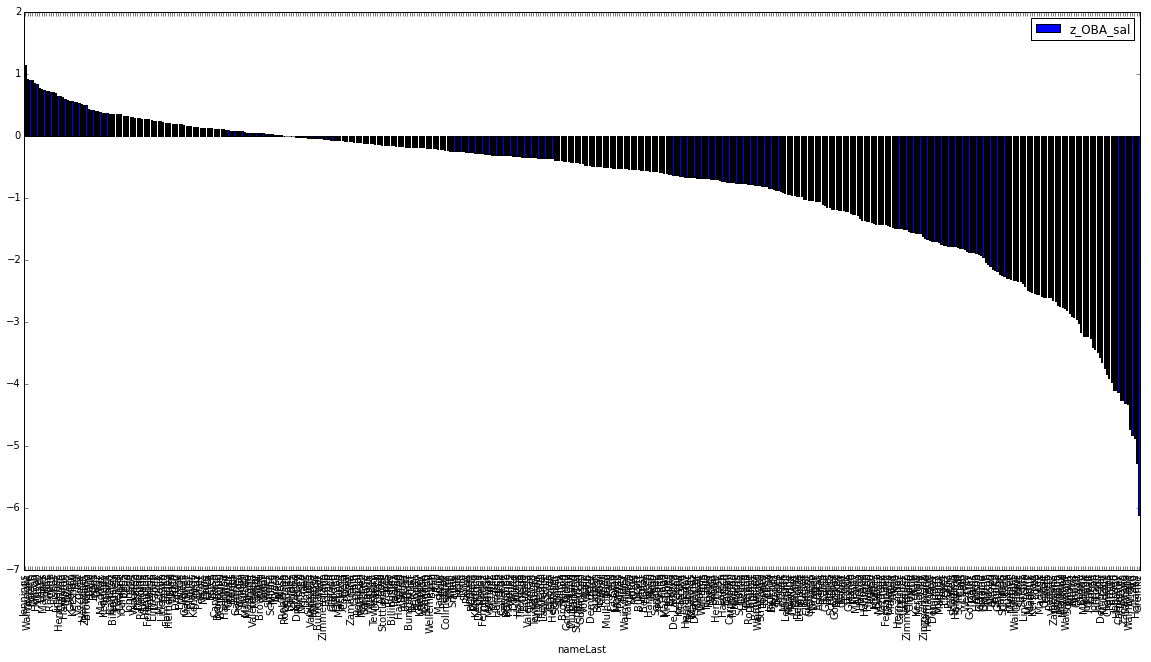

In [22]:
pitchers[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

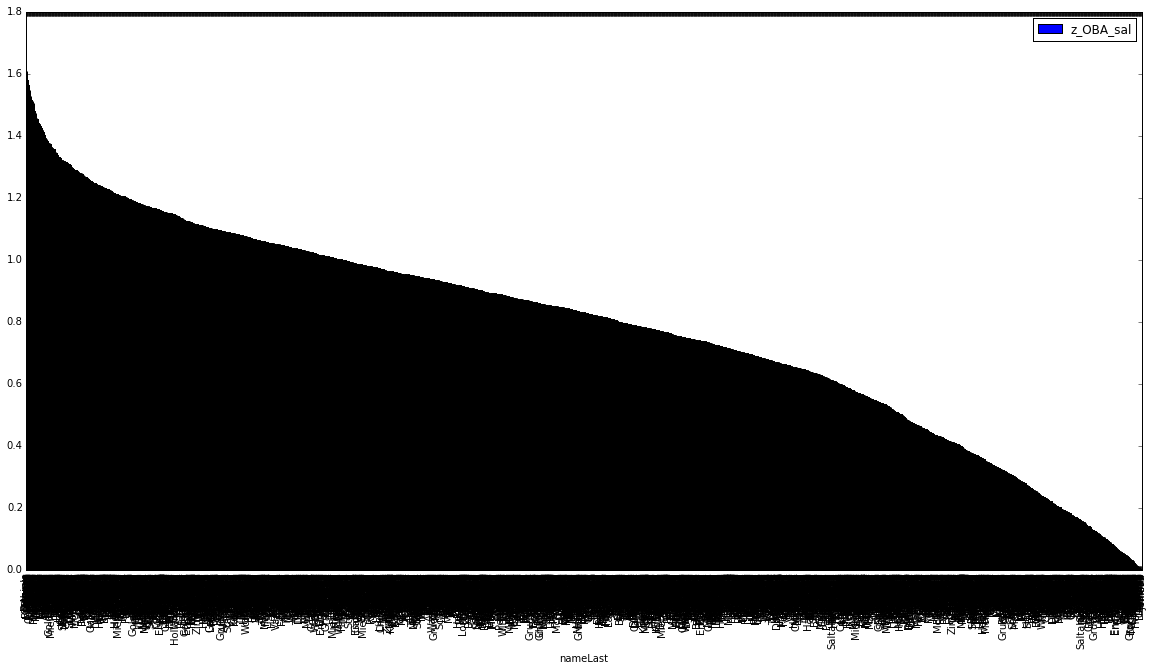

In [23]:
master_list[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

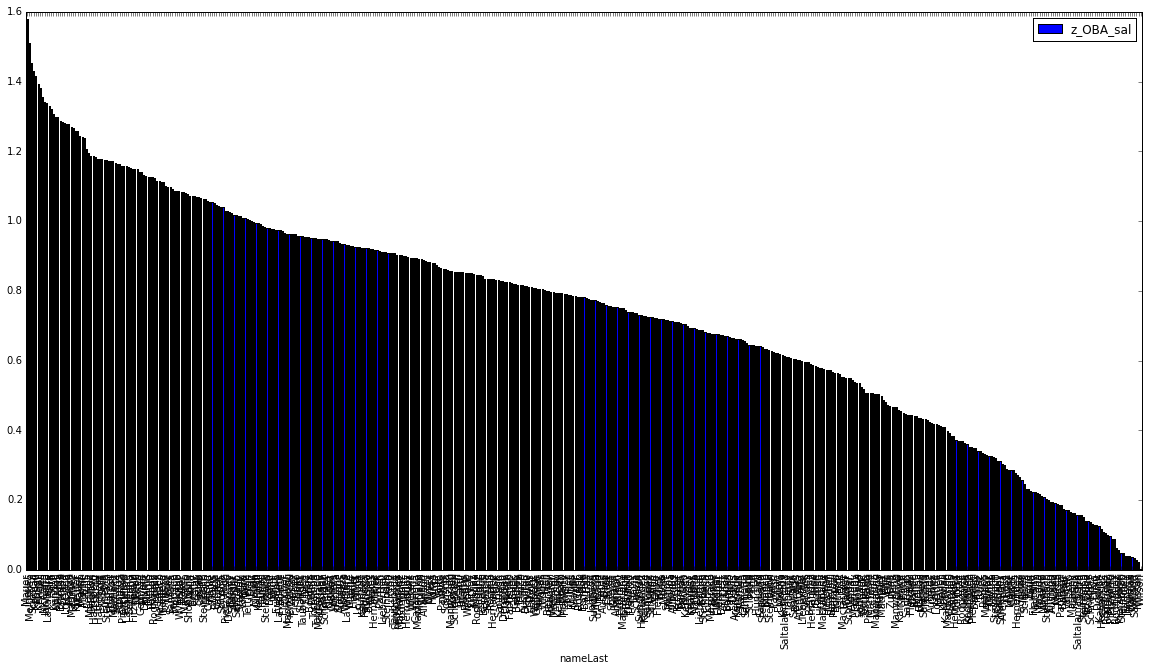

In [24]:
catchers[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

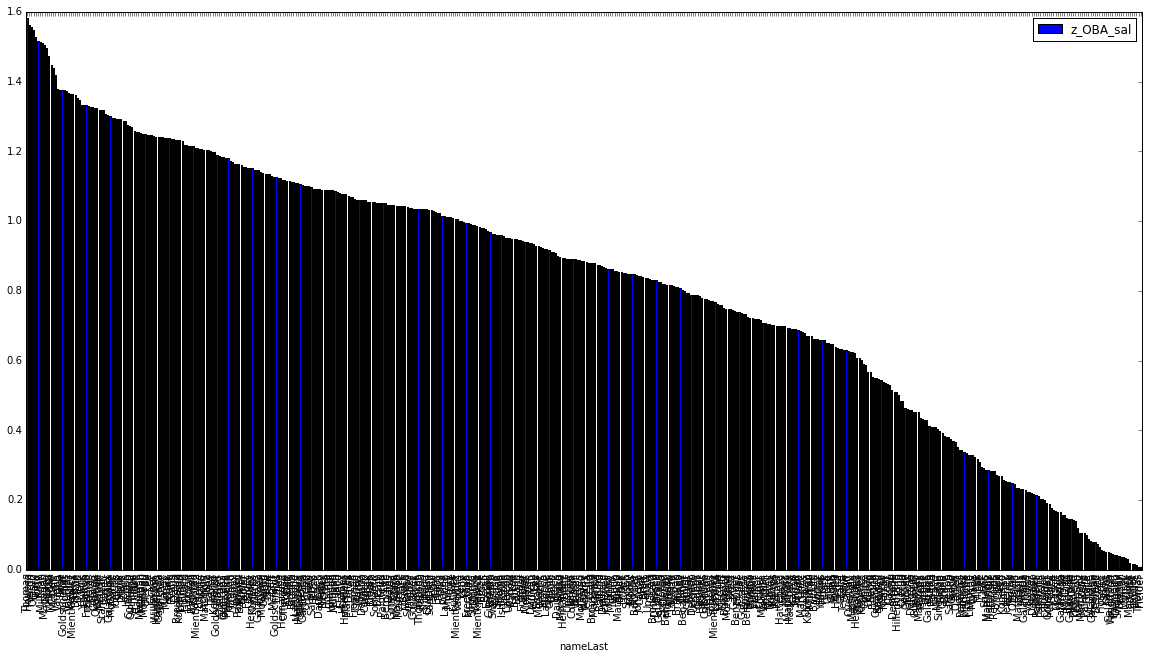

In [25]:
first_base[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

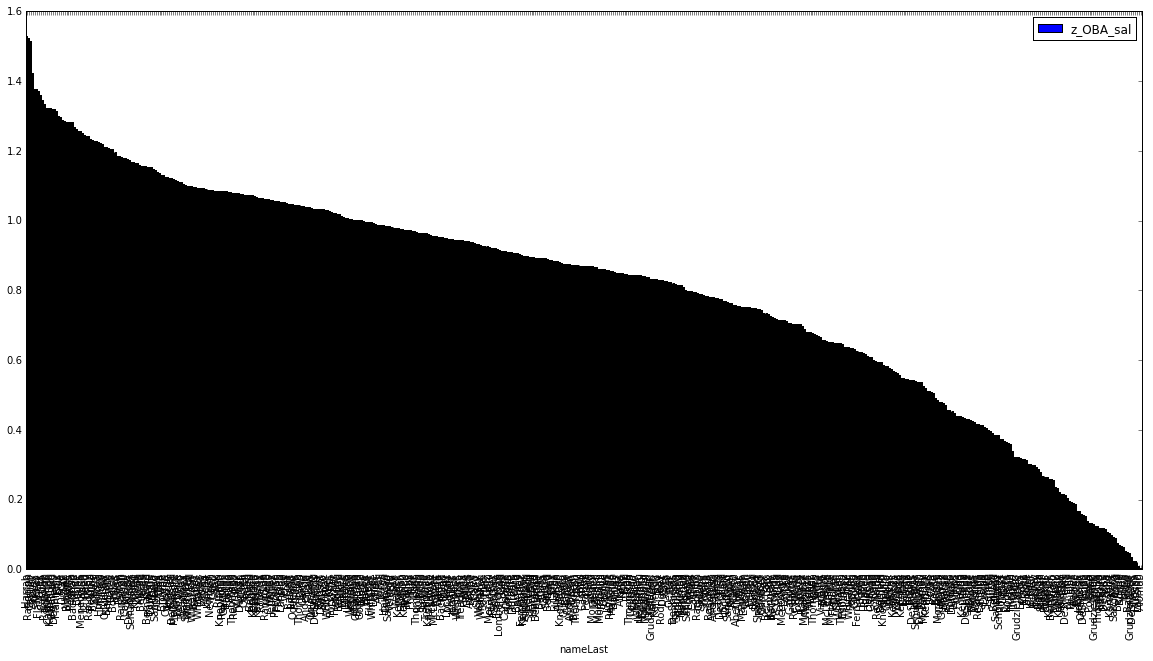

In [26]:
second_base[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

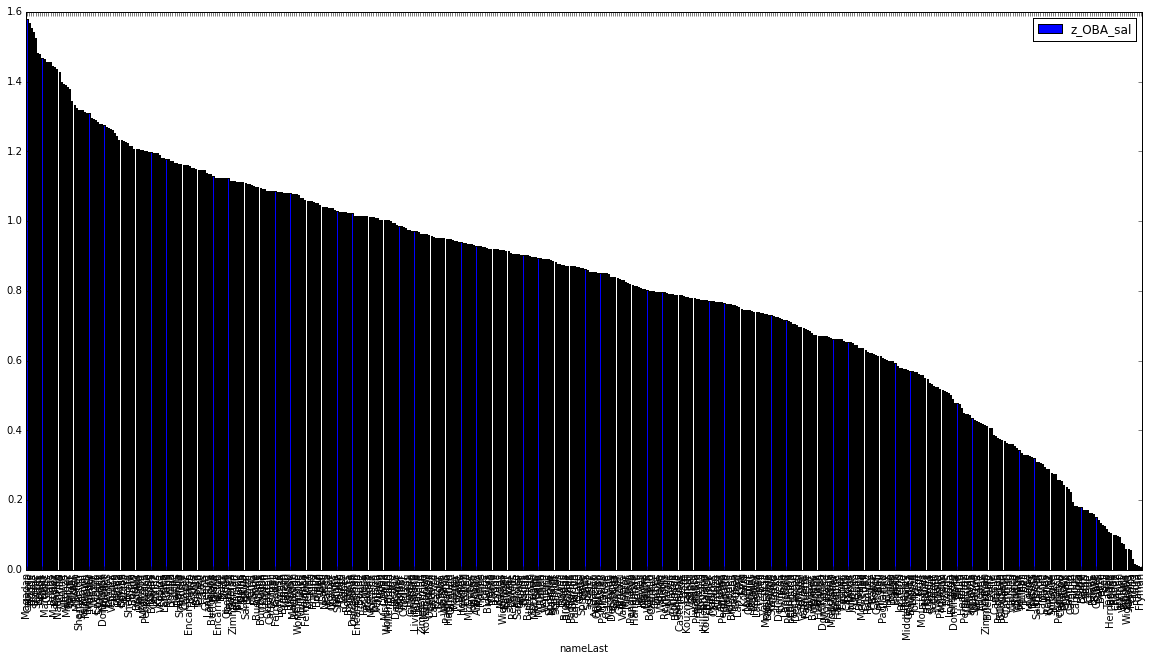

In [27]:
third_base[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

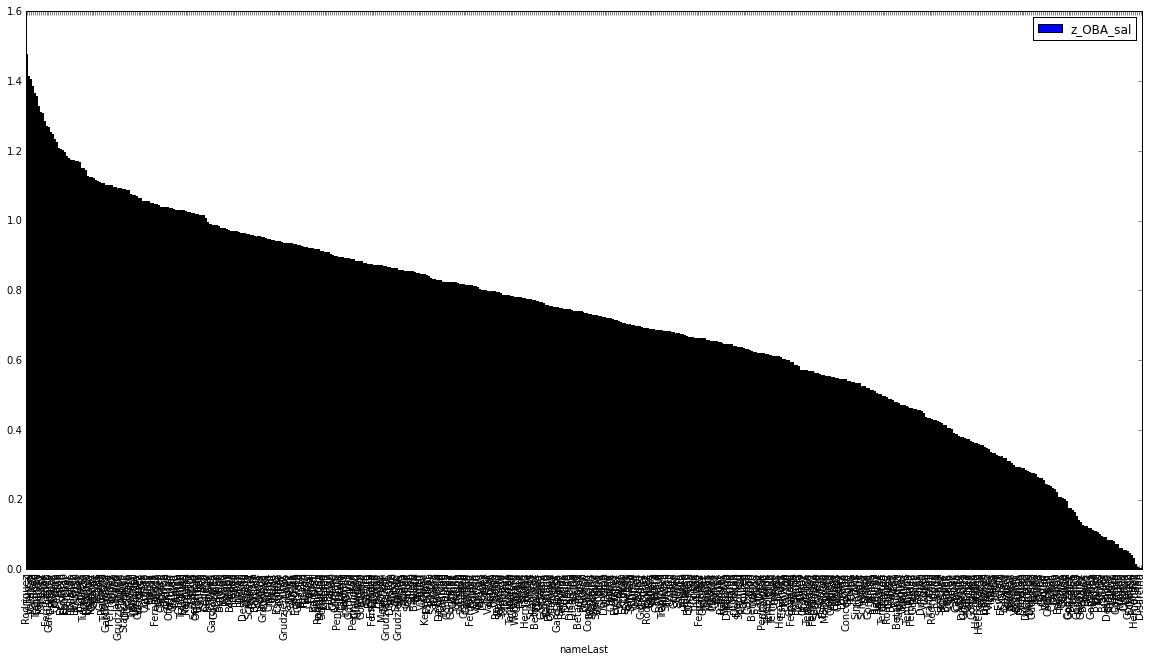

In [28]:
short_stop[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

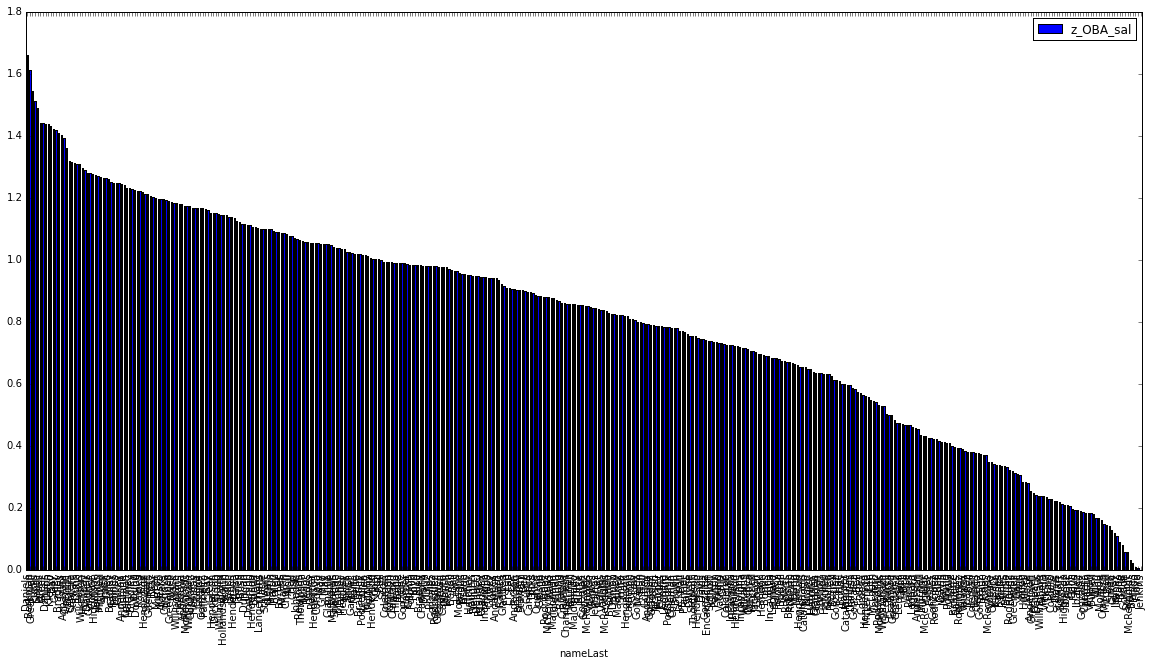

In [29]:
left_field[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

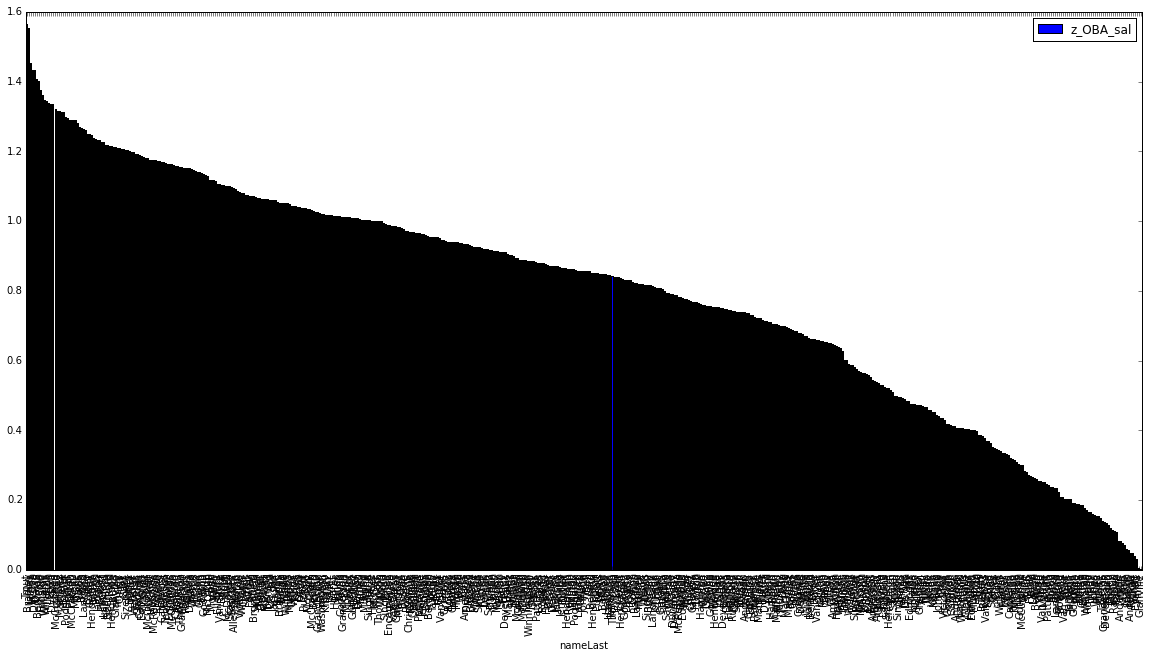

In [30]:
center_field[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

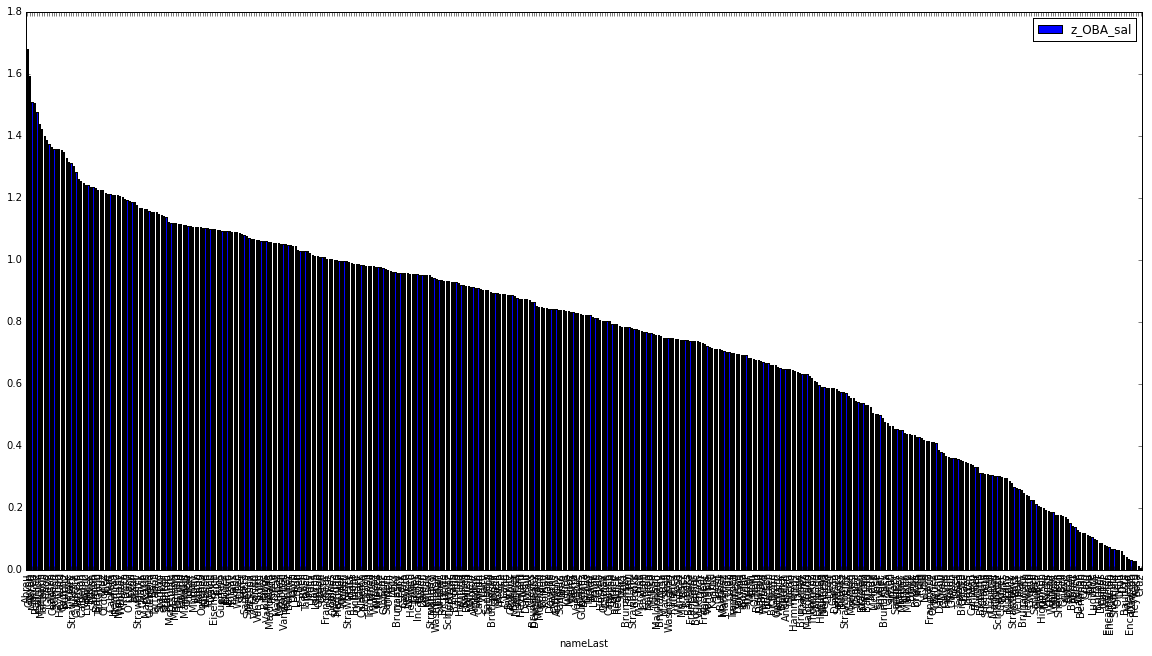

In [31]:
right_field[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

In [32]:
my_team = pd.concat([pitchers.head(1), catchers.head(1), first_base.head(1), second_base.head(1), third_base.head(1), short_stop.head(1), left_field.head(1), center_field.head(1), right_field.head(1)])
my_team_avg_OBA = my_team["OBA"].mean(axis=0)
my_team_avg_sal = my_team["salary"].mean(axis=0)

/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


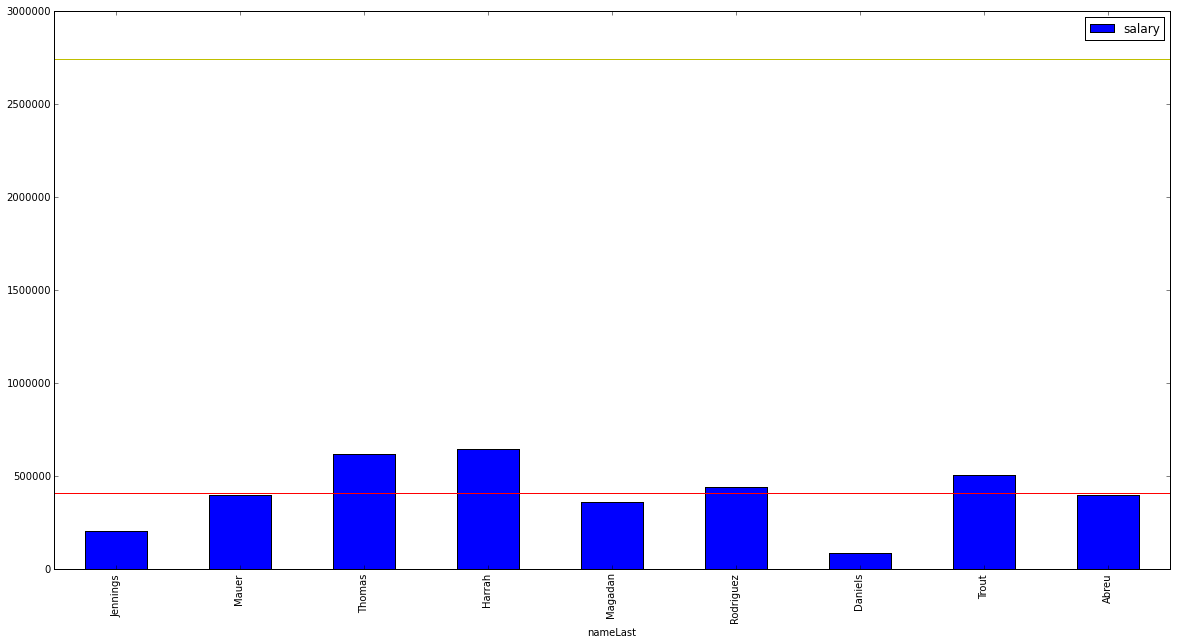

In [33]:
my_teams_sal = my_team[["salary"]].plot(kind="bar", figsize=(20, 10))
xmin, xmax = my_teams_sal.get_xlim()
my_teams_sal.hlines(y = [my_team_avg_sal, average_salary],xmin=xmin, xmax=xmax, color=['r', 'y'])

/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


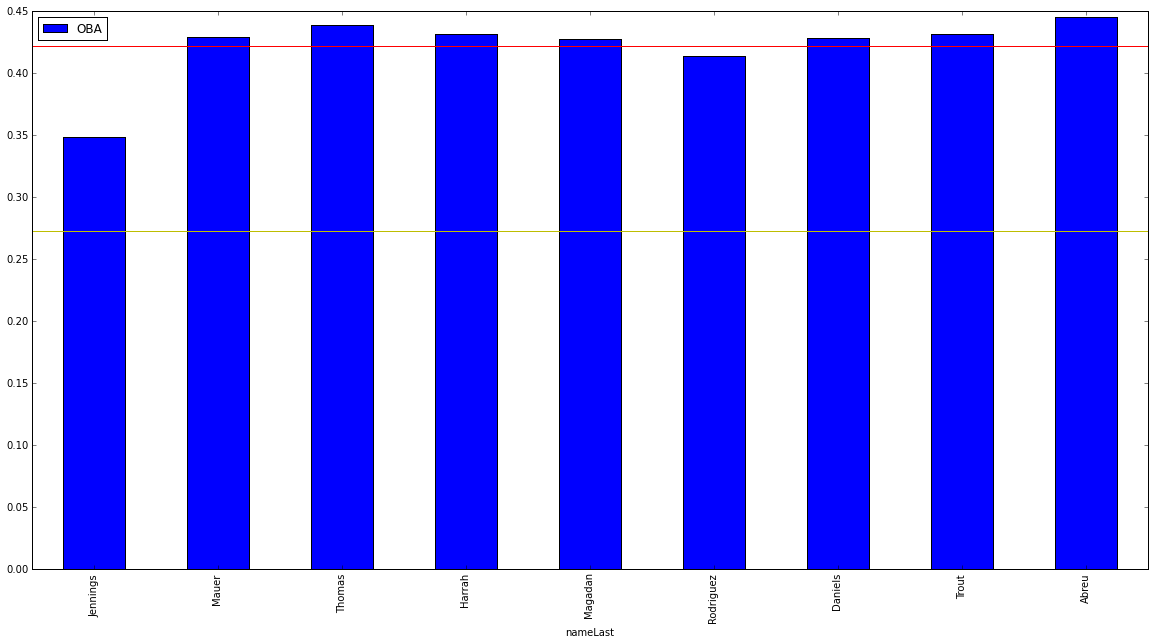

In [34]:
my_teams_OBA = my_team[["OBA"]].plot(kind="bar", figsize=(20, 10))
xmin, xmax = my_teams_OBA.get_xlim()
my_teams_OBA.hlines(y = [my_team_avg_OBA, average_OBA],xmin=xmin, xmax=xmax, color=['r', 'y'])

In [35]:
my_team

,AB,BB,ERA,H,HBP,L,OBA,POS,SF,W,infl_sal,nameGiven,salary,teamID,yearID,z_OBA,z_OBA_sal,z_salary
nameLast,,,,,,,,,,,,,,,,,,
Jennings,62,3,4.52,19,1,8,0.348485,P,0,16,271920.00,Jason Ryan,206000,COL,2002,0.470155,1.130124,-0.659968
Mauer,521,79,NaN,181,1,NaN,0.429276,C,7,NaN,468000.00,Joseph Patrick,400000,MIN,2006,0.970651,1.580127,-0.609476
Thomas,573,122,NaN,185,5,NaN,0.438819,1B,11,NaN,1047800.00,Frank Edward,620000,CHA,1992,1.029765,1.581980,-0.552216
Harrah,396,113,NaN,107,4,NaN,0.431599,2B,6,NaN,1430000.00,Colbert Dale,650000,TEX,1985,0.985042,1.529449,-0.544408
Magadan,348,71,NaN,109,0,NaN,0.427553,3B,2,NaN,558000.00,David Joseph,360000,HOU,1995,0.959978,1.579865,-0.619887
Rodriguez,601,59,NaN,215,4,NaN,0.414307,SS,7,NaN,667924.34,Alexander Emmanuel,442334,SEA,1996,0.877918,1.476375,-0.598457
Daniels,368,60,NaN,123,1,NaN,0.428904,LF,0,NaN,179920.00,Kalvoski,86500,CIN,1987,0.968347,1.659419,-0.691071
Trout,589,110,NaN,190,9,NaN,0.431564,CF,8,NaN,520200.00,Michael Nelson,510000,LAA,2013,0.984825,1.565670,-0.580846
Abreu,546,109,NaN,183,3,NaN,0.445619,RF,4,NaN,568000.00,Bob Kelly,400000,PHI,1999,1.071895,1.681370,-0.609476
